In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import random
%matplotlib inline

#### Read the data in and take a look

In [4]:
train_df=pd.read_csv('/Users/ReeceWooten/Documents/School /MSBA/Spring/Social Media/Data/train.csv')

In [5]:
train_df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


whether A > B (Choice = “1”) or B > A (Choice = “0”)

In [6]:
list(train_df)

['Choice',
 'A_follower_count',
 'A_following_count',
 'A_listed_count',
 'A_mentions_received',
 'A_retweets_received',
 'A_mentions_sent',
 'A_retweets_sent',
 'A_posts',
 'A_network_feature_1',
 'A_network_feature_2',
 'A_network_feature_3',
 'B_follower_count',
 'B_following_count',
 'B_listed_count',
 'B_mentions_received',
 'B_retweets_received',
 'B_mentions_sent',
 'B_retweets_sent',
 'B_posts',
 'B_network_feature_1',
 'B_network_feature_2',
 'B_network_feature_3']

#### Plot to see if there are any obvious linear trends

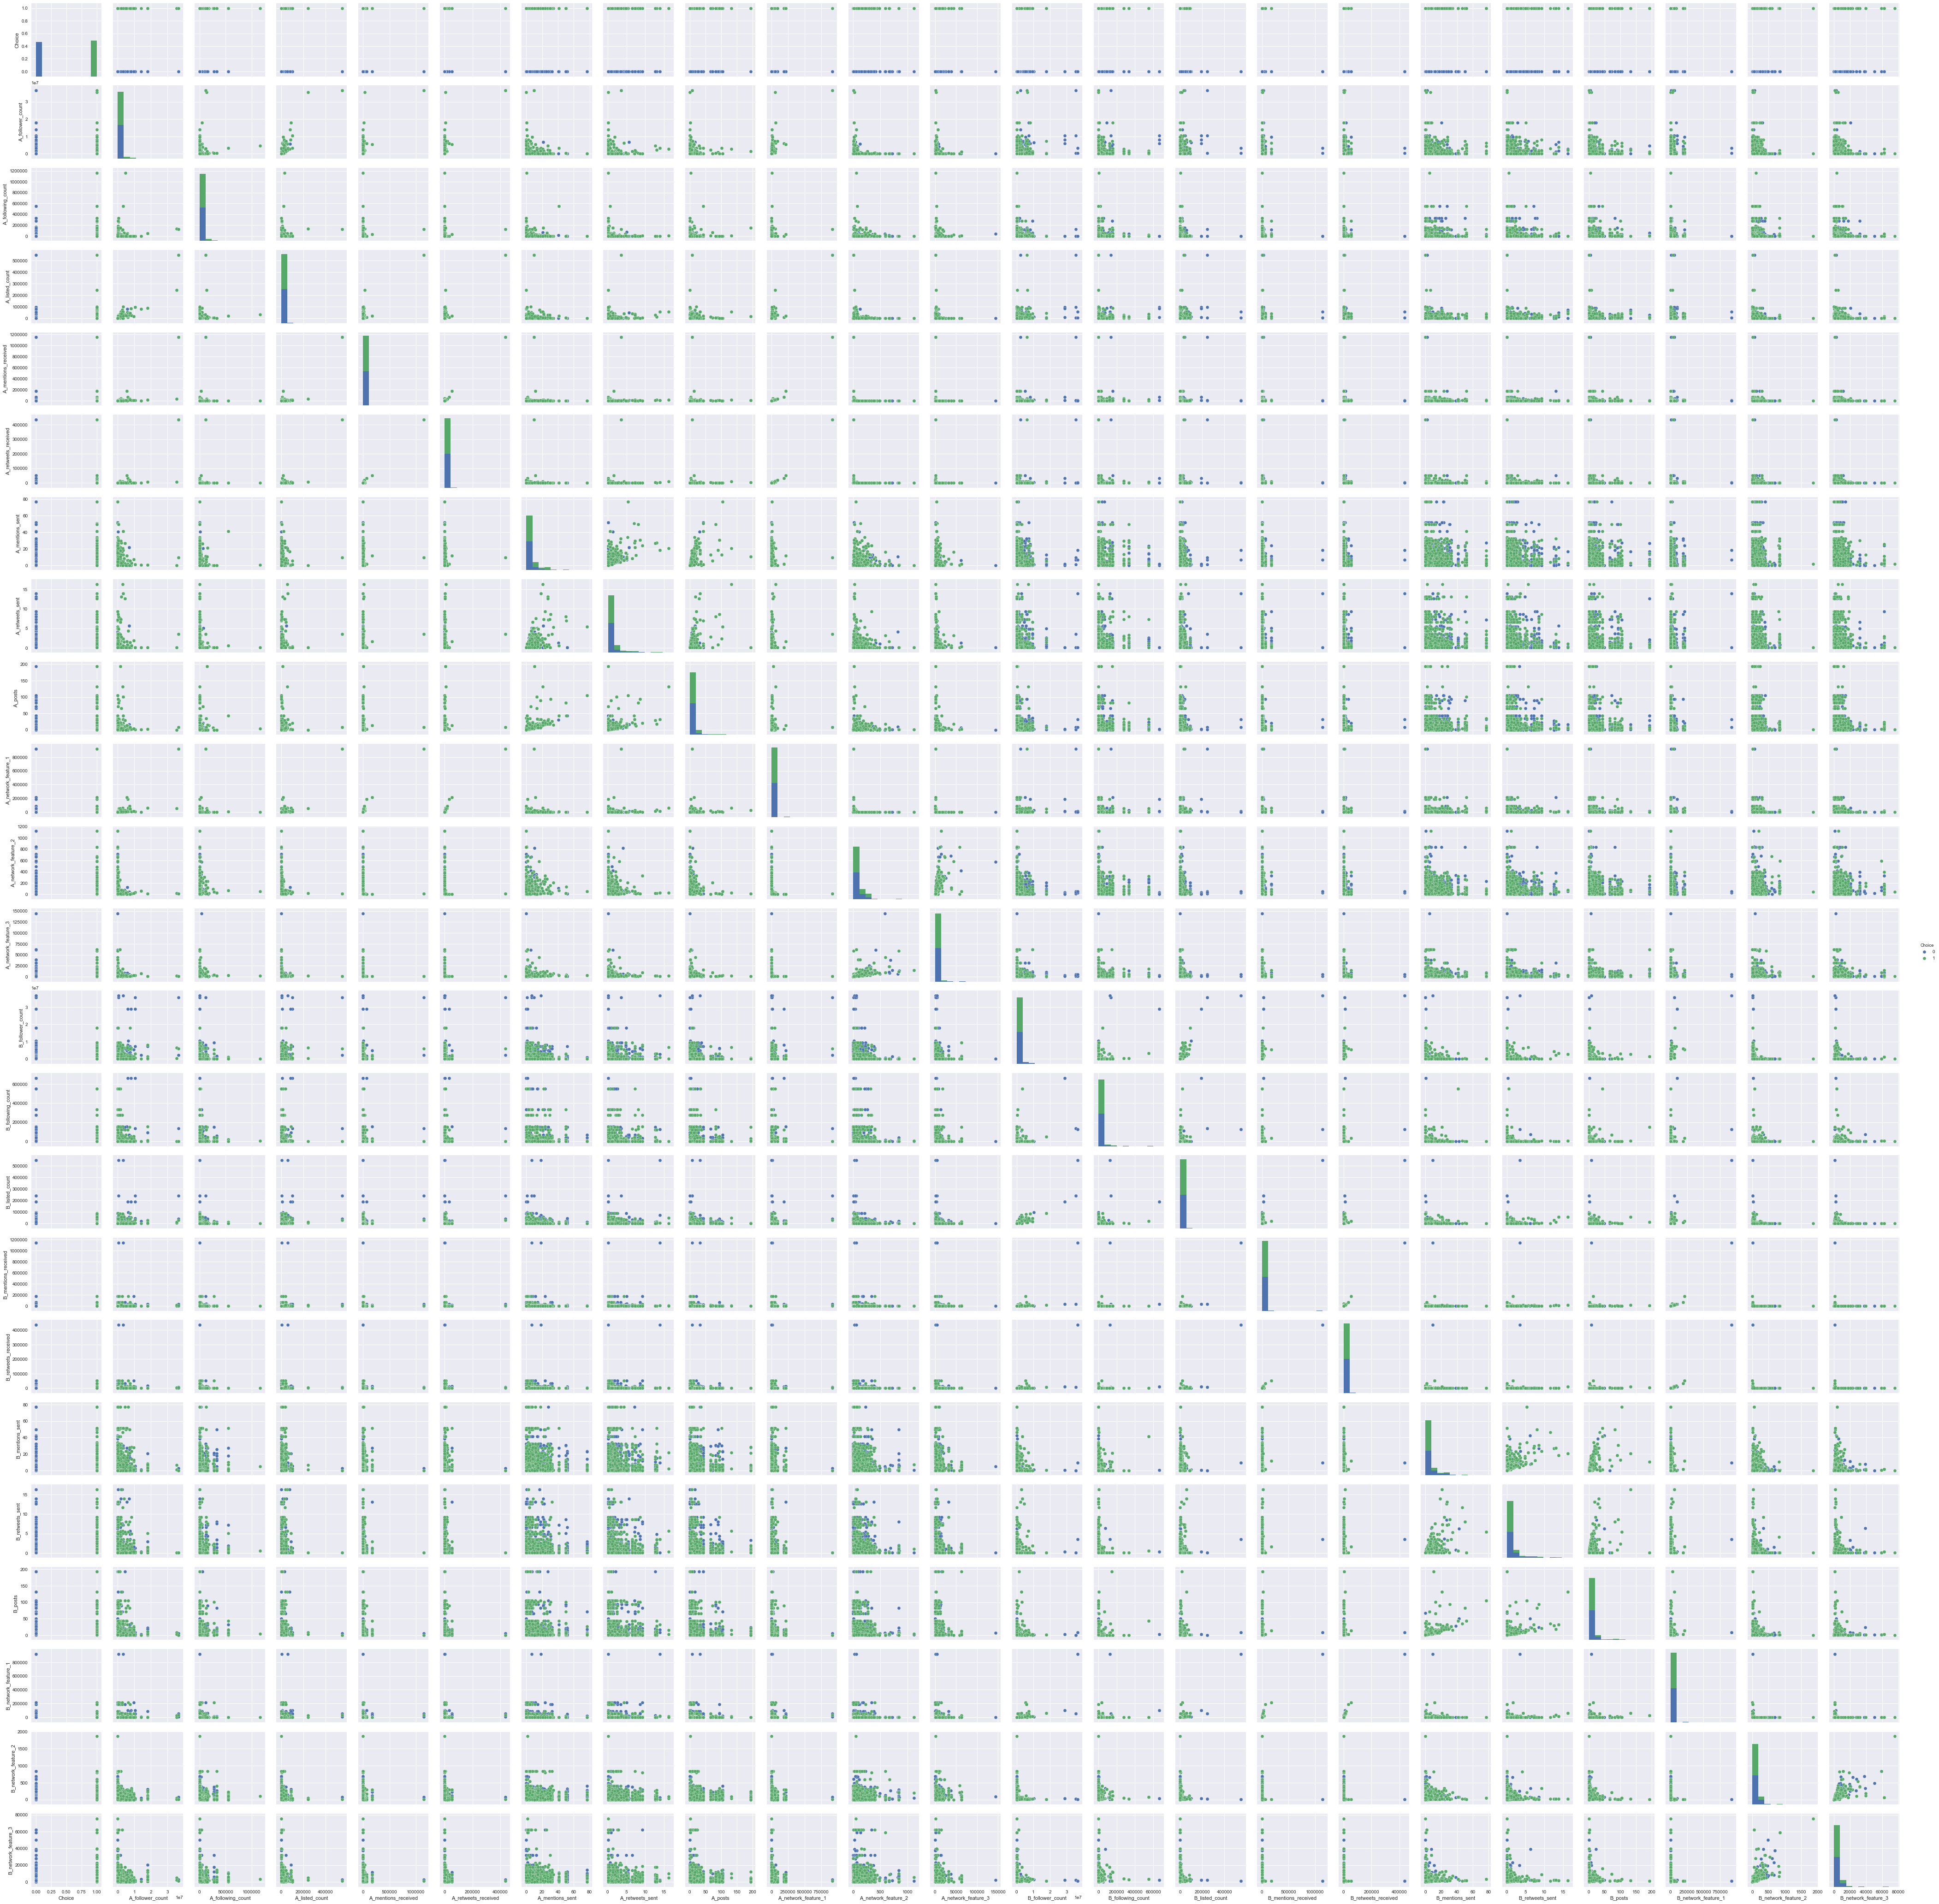

In [24]:
sns.pairplot(train_df,hue='Choice')

#### Check to see if classes are balanced
They appear to be balanced

In [26]:
train_df['Choice'].describe()

count    5500.000000
mean        0.509455
std         0.499956
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Choice, dtype: float64

#### Making feature table and target array along with training and test splits

In [138]:
train_att_df=train_df.loc[:, train_df.columns != 'Choice']
train_att=train_df.loc[:, train_df.columns != 'Choice'].as_matrix()
train_target=pd.DataFrame(train_df['Choice']).as_matrix()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(train_att, train_target, test_size=0.33, random_state=42)

#### randomized K fold cross validation

In [71]:
rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=5,random_state=1)

#### Classification Report

In [115]:
def class_report(mod_pred,y_test):
    print 'Confusion Matrix:'
    print confusion_matrix(mod_pred,y_test)
    print ' '
    print 'Classification Scores:'
    print 'Recall:',recall_score(mod_pred,y_test)
    print 'Accuracy:',accuracy_score(mod_pred,y_test)

#### Logistic regression baseline

In [117]:
logistic=linear_model.LogisticRegressionCV(cv=rskf,)
logistic_fit=logistic.fit(X_train,y_train)

In [118]:
pred=logistic_fit.predict(X_test)

In [119]:
class_report(pred,y_test)

Confusion Matrix:
[[645 200]
 [251 719]]
 
Classification Scores:
Recall: 0.741237113402
Accuracy: 0.751515151515


In [176]:
coef=logistic_fit.coef_.reshape((22,))

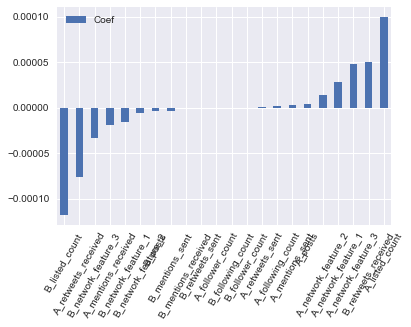

In [179]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_att_df.columns, coef):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Coef'})
importances.sort_values(by='Coef').plot(kind='bar', rot=60)

#### Random Forest

In [120]:
parameters = {'criterion':('entropy', 'gini'), 'n_estimators':[100,200,300]}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, parameters,cv=rskf)
rf_fit=rf_grid.fit(X_train, y_train)

In [121]:
pred_rf=rf_fit.predict(X_test)

In [122]:
class_report(pred_rf,y_test)

Confusion Matrix:
[[685 184]
 [211 735]]
 
Classification Scores:
Recall: 0.776955602537
Accuracy: 0.782369146006


In [132]:
rf_fit.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [141]:
rf_fin = RandomForestClassifier(n_estimators=300,criterion='gini')
rf_fin_fit=rf_fin.fit(X_train,y_train)


/Users/ReeceWooten/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


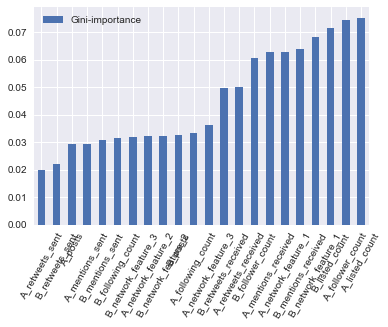

In [142]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_att_df.columns, rf_fin_fit.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=60)

#### XGBoost

In [125]:
parameters = {'n_estimators':[100,200,300],'max_depth':[3,5,7],'learning_rate':[.1,.01]}
xgb = GradientBoostingClassifier()
xgb_grid = GridSearchCV(xgb, parameters,cv=rskf)
xgb_fit=xgb_grid.fit(X_train, y_train)



In [126]:
pred_xgb=xgb_fit.predict(X_test)

In [127]:
class_report(pred_xgb,y_test)

Confusion Matrix:
[[679 186]
 [217 733]]
 
Classification Scores:
Recall: 0.771578947368
Accuracy: 0.777961432507


In [131]:
xgb_fit.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [143]:
xgb_fin = GradientBoostingClassifier(n_estimators=300,max_depth=3,learning_rate=.01)
xgb_fin_fit=xgb_fin.fit(X_train,y_train)

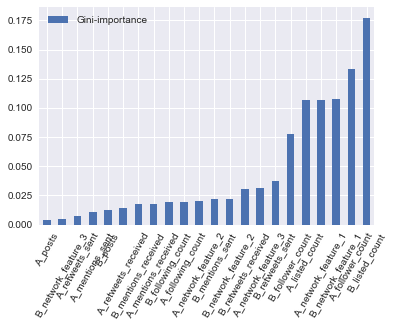

In [162]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_att_df.columns, xgb_fin_fit.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=60)

#### Best Model was Random Forest
* non-influencer benifit=0

* influencer 1 tweet= .05% conversion

* influencer 2 tweets=.075% conversion

* retailer profit margin= $10

* retailer cost $5 for 1 tweet

* retailer cost $10 for 2 tweets from influencer identified by model

* non-influencers are not paid to tweet

* Lift in expected net profit from using the analytical model vs no model?

* Lift in net profit from perfect model?



In [192]:
train_df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


#### Cost and revenue/unit formulas

In [218]:
cost_1T=-5
cost_2T=-10
rev_inf_1T=(10*.0005)
rev_inf_2T=(.00075*10)

No Model

Randomly choose between A and B to be the influencer

only pay for them to tweet once

In [233]:
followers=train_df[['Choice','A_follower_count','B_follower_count']]
all_pred=rf_fit.predict(train_att)
followers['prediction']=all_pred

/Users/ReeceWooten/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Paying both tweeters for one tweet

In [235]:
profit=0
for row in followers.itertuples(index=False):
    rev=0
    inf,a_fol,b_fol,pred=row
    if inf==1:
        rev+=(rev_inf_1T*a_fol)
    else:
        rev+=(rev_inf_1T*b_fol)
    profit+=rev-10 # from giving both tweeters 5 dollars
no_anlytics_profit=profit
print no_anlytics_profit

26827842.965


#### My Model

In [229]:
all_pred=rf_fit.predict(train_att)
followers['prediction']=all_pred

/Users/ReeceWooten/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [236]:
profit=0
for row in followers.itertuples(index=False):
    rev=0
    inf,a_fol,b_fol,pred=row
    if pred==1:
        if inf==1:
            rev+=(rev_inf_2T*a_fol)
        else:
            rev+=0
    else:
        if inf==0:
            rev+=(rev_inf_2T*b_fol)
        else:
            rev+=0
    profit+=rev-10 # from giving model prediction 10 dollars to tweet twice
model_profit=profit
print model_profit

38756805.6275


#### Perfect Model

In [238]:
profit=0
for row in followers.itertuples(index=False):
    rev=0
    inf,a_fol,b_fol,pred=row
    if inf==1:
        rev+=(rev_inf_2T*a_fol)
    else:
        rev+=(rev_inf_2T*b_fol)
    profit+=rev-10 # from getting 2 tweets from known influencer
perfect_model_profit=profit
print perfect_model_profit

40269264.4475


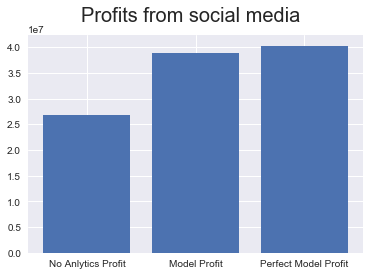

In [244]:
height = [no_anlytics_profit, model_profit, perfect_model_profit]
bars = ('No Anlytics Profit', 'Model Profit', 'Perfect Model Profit')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.suptitle('Profits from social media', fontsize=20)

# Show graphic
plt.show()
